# Lab 1

<b>Class:</b> MSDS 7331 Data Mining
<br> <b>Dataset:</b> Belk Endowment Educational Attainment Data 

<h1 style="font-size:150%;"> Teammates </h1>
Maryam Shahini
<br> Murtada Shubbar
<br> Michael Toolin
<br> Steven Millett

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import math
import re

%matplotlib inline

In [21]:
#
# The 2017 Public Schools Machine Learning Date Set is being used throughout this analysis.  The _ML suffix is removed to less name space size
#
# Load Full Public School Data Frames for each year
#
school_data = pd.read_csv('./Data/2017/machine Learning Datasets/PublicSchools2017_ML.csv', low_memory=False)

# Business Understanding 

The North Carolina General Assmebly passed legislation in 2014-2014 requiring the assignment of School Performance Grades (SPG) for public and charter Schools [1].  This data set is collected in response to this legislation.  A school's SPG is calculated using 80% of the schools achievment score and 20% of the schools growth score.  The achievment score is calculated through a variety of student testing and the growth score is calculated using the EVASS School Accountablityy Growth Composite Index [2]. Schools are assigned a letter grade where A: 100-85 points, B: 84-70 points, C: 69-55 points, D: 54-40 points and F: less than 40 points.  Schools that receive grades of D or F are required by to inform parents of the school district.  In 2016, the North Carolina General Assmebly passed legislation creating the Achievment School District(ASD). This school district is run by a private organization and are run as charter schools [3].

This data set contains 334 features describing 2443 schools.  The data includes testing results used to derive the SPG described above.  It also contains school financial data, demographic information, attendence, and student behavior data measured by metrics such as susupension and expulsions. We can look into all these different types of information to see if any correlation with school performances exists, both good and bad.  Do poorly performing schools line up with any specific demographics?  Are there school financial situations that help attribute to a schools performance? Finding correlations of this data with SPG and being able to use that information in a predictive analysis algorithm may help educators identify schools before the perfomance metrics deteriorate, allowing them to intervene. The end result of all the testing and analaysis is providing all students a fair and equal opportunity at a qualtiy eduction.

[1] source: http://schools.cms.k12.nc.us/jhgunnES/Documents/School%20Performance%20Grade%20PP%20January%2014,%202015%20(1).pptx
[2] (EVASS Growth information available at http://www.ncpublicschools.org/effectiveness-model/evaas/selection/)
[3] source: https://www.ncforum.org/committee-on-low-performing-schools/

###citation: Drew J., The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools, (2018), GitHub repository, https://github.com/jakemdrew/EducationDataNC

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

# Data Meaning Type 

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

The comprehensive description of all 334 attributes can be found in the data-dictionary.pdf associated with the NC Report Card database provided by Dr. Drew. We were interested in 60 variables moving forward in the course. We visualize several attributes of interest in this report.  

<img src="files/data_meaning.jpg">

In [ ]:
school_data.info(verbose=True)

In [ ]:
#scatter_matrix(school_data)

# Data Quality

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [6]:
# to find the missing values if any: there is no missing values in our dataset to worry about.
#Print out all the missing value rows
pd.set_option('display.max_rows', 10000)

print('\r\n**The Remaining Missing Values Below will be set to Zero!**')

#Check for Missing values 
missing_values = school_data.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values = missing_values[missing_values['Number Missing Values'] > 0] 
missing_values



**The Remaining Missing Values Below will be set to Zero!**


,Variable Name,Number Missing Values


# Simple Statistics

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

In [7]:
school_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
student_num,2443.0,584.173966,386.933479,5.000,337.500000,512.000000,725.000000,2974.000000
lea_avg_student_num,2443.0,584.245600,271.986506,5.000,427.500000,529.000000,683.000000,1852.000000
st_avg_student_num,2443.0,586.074089,150.150219,278.000,490.000000,490.000000,629.000000,853.000000
00_Size,2443.0,9.969709,9.588669,0.000,0.000000,14.000000,19.000000,27.000000
02_Size,2443.0,10.153090,9.756678,0.000,0.000000,14.000000,20.000000,28.000000
03_Size,2443.0,10.067131,9.756138,0.000,0.000000,14.000000,20.000000,40.000000
04_Size,2443.0,11.209578,10.842040,0.000,0.000000,15.000000,21.000000,44.000000
05_Size,2443.0,11.152272,11.173440,0.000,0.000000,14.000000,22.000000,68.000000
Math I_Size,2443.0,8.808023,11.225975,0.000,0.000000,0.000000,19.000000,42.000000
lea_total_expense_num,2443.0,9337.465980,1014.397854,8150.840,8731.670000,9008.240000,9740.490000,17718.540000


In [8]:
school_data_simple = school_data[['SPG Score','lea_avg_student_num','student_num']]
school_data_simple.describe()

,SPG Score,lea_avg_student_num,student_num
count,2443.000000,2443.000000,2443.000000
mean,60.911584,584.245600,584.173966
std,19.573094,271.986506,386.933479
min,0.000000,5.000000,5.000000
25%,53.000000,427.500000,337.500000
50%,64.000000,529.000000,512.000000
75%,73.000000,683.000000,725.000000
max,100.000000,1852.000000,2974.000000


### Simple Statistics on SPG Score, and number of students in schools
The table above show us statistics for SPG.  Understanding the mean SPG score is 60.91, which is in the lower part of the "C" range.  The median SPG score
is 64.00, also in "C" range.  It is surprising to see a maximum SPG score of 100 as this indicates perfect scoring for some individual school.  Also the minimum score of 0 mean total failure in testing.  Both of these data points require more investigation to see if see if there are any errors in the data and where these points come from.

In [9]:
# Find the schools whose SPG =1 00
school_SPG_100 =(school_data.loc[school_data['SPG Score'] == 100])
print (school_SPG_100['unit_code'])

371    190501
Name: unit_code, dtype: int64


The school with unit code 190501 has a perfect SPG. The data in this field should be examined for errors or to understand why they received a perfect SPG.

In [10]:
# Find the schools whose SPG = 0  Purposely coded different than above to show various coding techniques
school_SPG_0 =(school_data['unit_code'].loc[school_data['SPG Score'] == 0])
print (school_SPG_0)

24       10378
51       40305
74       60334
77       70302
79       70310
115     100308
131     110303
169     110432
184     120308
199     120352
221     130317
238     130336
259     140306
260     140307
291     160309
317     180323
356     190310
379     200322
389     210316
401     230330
414     230359
442     241312
444     241320
470     260302
498     260363
509     260374
530     260412
531     260413
544     260432
550     260449
569     280306
583     290310
585     290314
617     291348
618     291350
624     300306
666     320322
673     320336
677     320341
726     340336
727     340344
741     340385
744     340398
752     340427
756     340436
787     340531
820     360338
828     360372
834     360394
842     360430
861     360499
879     390314
899     400321
929     410379
937     410396
964     410457
965     410458
970     410464
998     410533
999     410534
1045    430304
1054    430340
1056    430345
1064    430368
1076    440326
1106    450343
1127    47

The list above shows 130 schools with SPG = 0.  This is more problematic than the single school whose SPG = 100.  Nonetheless we need to understand why 130 schools had an SPG = 0 and requires future investigation.

In [11]:
school_data_finance = school_data[['lea_total_expense_num','lea_salary_expense_pct',
                                  'lea_services_expense_pct', 'lea_supplies_expense_pct',
                                  'lea_instruct_equip_exp_pct']]
school_data_finance.describe()

,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,9337.465980,0.834615,0.079380,0.076526,0.009479
std,1014.397854,0.024518,0.015031,0.015094,0.006666
min,8150.840000,0.761000,0.052000,0.028000,0.001000
25%,8731.670000,0.816000,0.069000,0.069000,0.006000
50%,9008.240000,0.835000,0.079000,0.078000,0.009000
75%,9740.490000,0.852000,0.085000,0.091000,0.012000
max,17718.540000,0.878000,0.148000,0.117000,0.045000


Looking at the expenses, the LEA with largest number of expenses is 90% higher than the mean for all LEA's in the state.  All other quantiles are closer to the mean, indicating a good chance this in outlier.  We will look for this school to see if there are errors in the data and consider how to handle this.

In [12]:
demog_male_cols = [col for col in school_data.columns if "Male" in col]
demog_female_cols = [col for col in school_data.columns if "male" in col]
school_data_demog_male = school_data[np.intersect1d(school_data.columns, demog_male_cols)]
school_data_demog_female = school_data[np.intersect1d(school_data.columns, demog_female_cols)]
school_data_demog_all = pd.concat([school_data_demog_female, school_data_demog_male], axis=1)
school_data_demog = school_data_demog_all.filter(regex='^(?!(EOC|Two).*?)') 

school_data_demog.describe()

,AsianFemalePct,BlackFemalePct,HispanicFemalePct,IndianFemalePct,MinorityFemalePct,PacificIslandFemalePct,AsianMalePct,BlackMalePct,HispanicMalePct,MinorityMalePct,PacificIslandMalePct
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,0.012284,0.128583,0.082390,0.006774,0.250685,0.000643,0.012858,0.136726,0.085380,0.263320,0.000647
std,0.023180,0.113157,0.063890,0.031991,0.135215,0.001643,0.025016,0.123180,0.065805,0.145042,0.001948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035782,0.037125,0.000000,0.139039,0.000000,0.000000,0.037559,0.038503,0.140693,0.000000
50%,0.004902,0.100719,0.064240,0.000897,0.237443,0.000000,0.004967,0.105263,0.066986,0.247166,0.000000
75%,0.013634,0.195891,0.110004,0.003115,0.356408,0.000000,0.014103,0.206682,0.113101,0.376314,0.000000
max,0.316042,0.861386,0.419355,0.450413,0.970297,0.037162,0.338136,0.910569,0.412442,1.000000,0.057432


The above table shows actual quantile breakdown by minority demographics.  It is interesting to note there is at least one LEA that has 0 minorities and at least one where the entire male population is made up of minorities.  Identifying these LEA's may provide some information.

# Visualize Attributes

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [13]:
def prefixsearch(search_string, missing_value ,start_of_search_string,end_of_search_string):
    if re.search(end_of_search_string, search_string):
        return re.search('('+ start_of_search_string +'\S*)(?='+ end_of_search_string +')',search_string).group(0)
    else:
        return missing_value



In [14]:
teacher_temp_col = [col for col in school_data.columns if 'tchyrs' in col]
teacher_columns = school_data[teacher_temp_col].melt(var_name='col',value_name='values')

teacher_columns['year'] = teacher_columns['col'].apply(lambda name: re.search('(?<=tchyrs_)\S*(?=_)',name).group(0))
teacher_columns['region'] = teacher_columns['col'].apply(lambda name: prefixsearch(name, "Sch", '^\S*','_tch'))



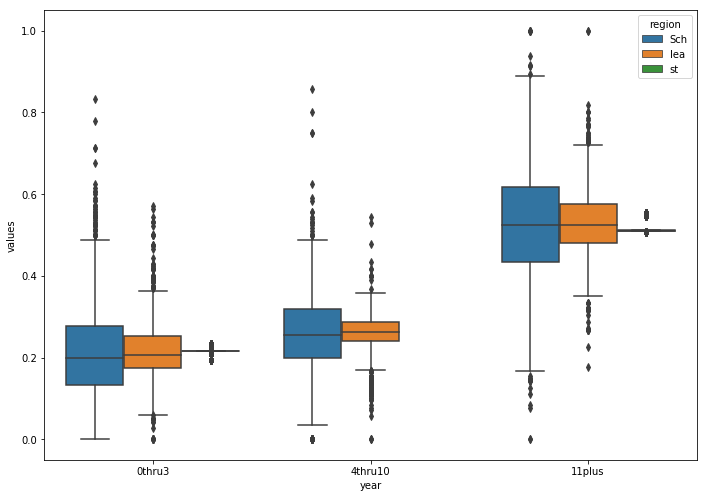

In [15]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=teacher_columns,x='year', y='values', hue='region');

# Makeup of teachers in classrooms
In the graph above we are looking at the percentage of teachers that makeup a classroom based on their years of tenure.

In [16]:
sex_temp_col = school_data.filter(regex=('[Mm]alePct')).columns
sex_teacher_columns = school_data[sex_temp_col].melt(var_name='col',value_name='Values')

sex_teacher_columns['Race'] = sex_teacher_columns['col'].apply(lambda name: prefixsearch(name, "", '^','Male|Female'))
sex_teacher_columns['Sex'] = sex_teacher_columns['col'].apply(lambda name: 'Female' if re.search('Female',name) else 'Male')



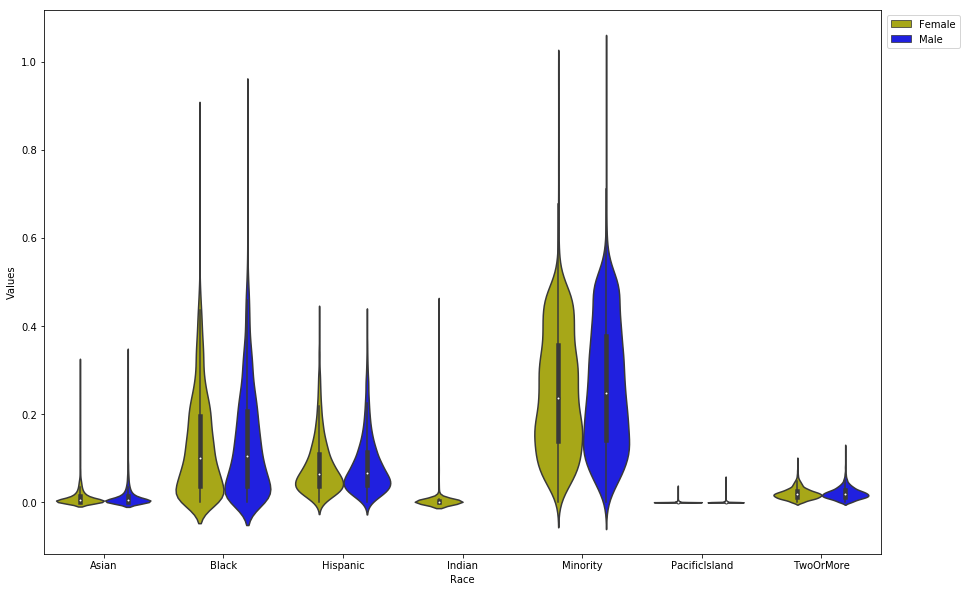

In [17]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='Race',y='Values',hue='Sex',data=sex_teacher_columns,palette={"Male": "b", "Female": "y"});

leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

# Makeup of minorities in classrooms

In the graph above we are looking at the percentage of minorities that makeup a classroom as represented with a violin plot. Each half of the violin represents the different sexual make-up of each race.


In [23]:
support_col = school_data.filter(regex=('wap|books|stud_internet')).columns
support_columns = school_data[support_col].melt(var_name='col',value_name='Values')

support_columns = support_columns[support_columns['Values']!=0]

support_columns['Values'] = support_columns['Values'].apply(lambda value: math.log(value))


#support_columns['media'] = sex_teacher_columns['col'].apply(lambda name: 'Female' if re.search('Female',name) else 'Male')

support_columns['region'] = support_columns['col'].apply(lambda name: prefixsearch(name, "Sch", '^\S*','_wap|_books|_stud_int'))
support_columns['media'] = support_columns['col'].apply(lambda name: re.sub('lea_','',name) if re.search('lea',name) else name )
support_columns = support_columns.sort_values(by='Values')
#print(support_columns.sample(20))

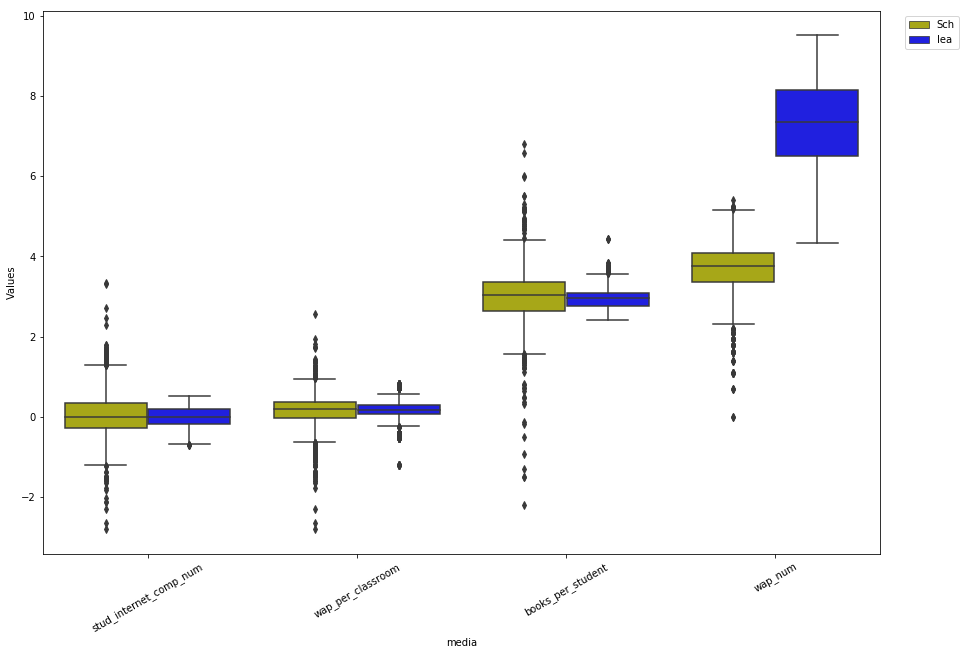

In [24]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='media',y='Values',hue='region',data=support_columns,palette={"lea": "b", "Sch": "y"});
plt.xticks(rotation=30)

leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

# Media and Computer resources available
These box plots map the difference in the amount of resources that the average LEA has and the variance per school.

In [25]:
TCHR_col = school_data.filter(regex=('TCHR_Standard')).columns
TCHR_columns = school_data[TCHR_col].melt(var_name='col',value_name='Values')

TCHR_columns['Standard'] = TCHR_columns['col'].apply(lambda name: re.search('(?<=TCHR_).*(?=_Pct)',name).group(0))
TCHR_columns['Level'] = TCHR_columns['col'].apply(lambda name: prefixsearch(name, "stnd", '^','_TCHR'))


AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='Level',y='Values',hue='Standard',data=TCHR_columns);
plt.xticks(rotation=30)


leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .15
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

# Here is some text about the graph

In [26]:
EOG_col = school_data.filter(regex=('EOGG')).columns
EOG_columns = school_data[EOG_col].melt(var_name='col',value_name='Values')

EOG_columns['Grade'] = EOG_columns['col'].apply(lambda name: re.search('(?<=EOG).*(?=_[CG])',name).group(0))
EOG_columns['Level'] = EOG_columns['col'].apply(lambda name: re.split('EOGGr[3-5]_',name)[1])

EOG_columns = EOG_columns.sort_values(by='Level')

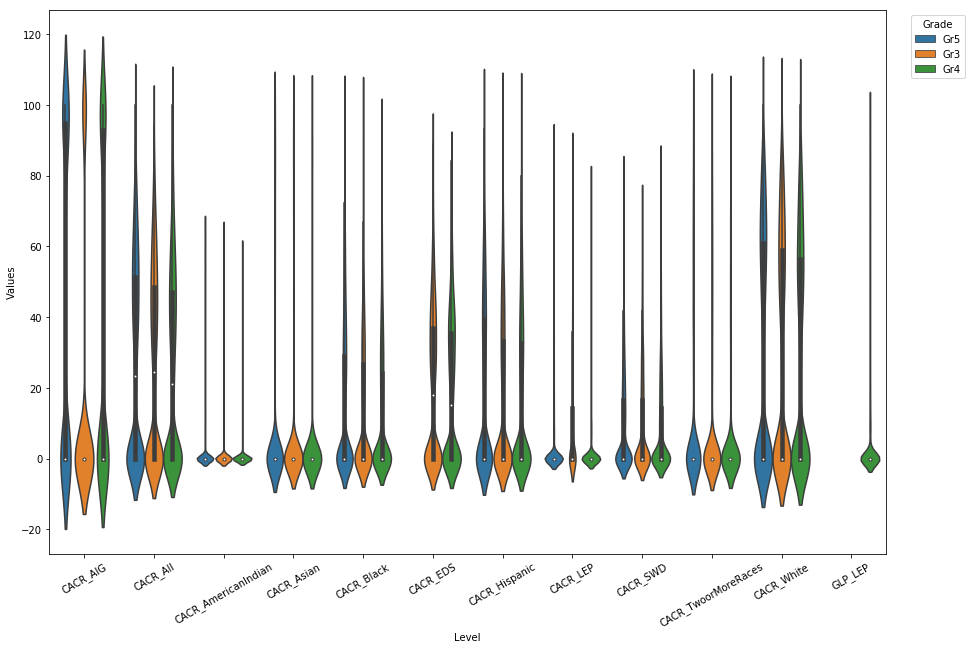

In [27]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.violinplot(ax=ax,x='Level',y='Values',hue='Grade',data=EOG_columns);
plt.xticks(rotation=30)

leg = plt.legend( loc = 'upper right',title='Grade')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

# Here is some text about the EOG stats

In [28]:
EOC_col = school_data.filter(regex=('^EOC')).columns
EOC_columns = school_data[EOC_col].melt(var_name='col',value_name='Values')

EOC_columns['Subject'] = EOC_columns['col'].apply(lambda name: re.search('(?<=EOC).*(?=_[CG])',name).group(0))
EOC_columns['Level'] = EOC_columns['col'].apply(lambda name: re.split('EOC(Subjects|MathI)_',name)[2])

EOC_columns = EOC_columns.sort_values(by='Level')

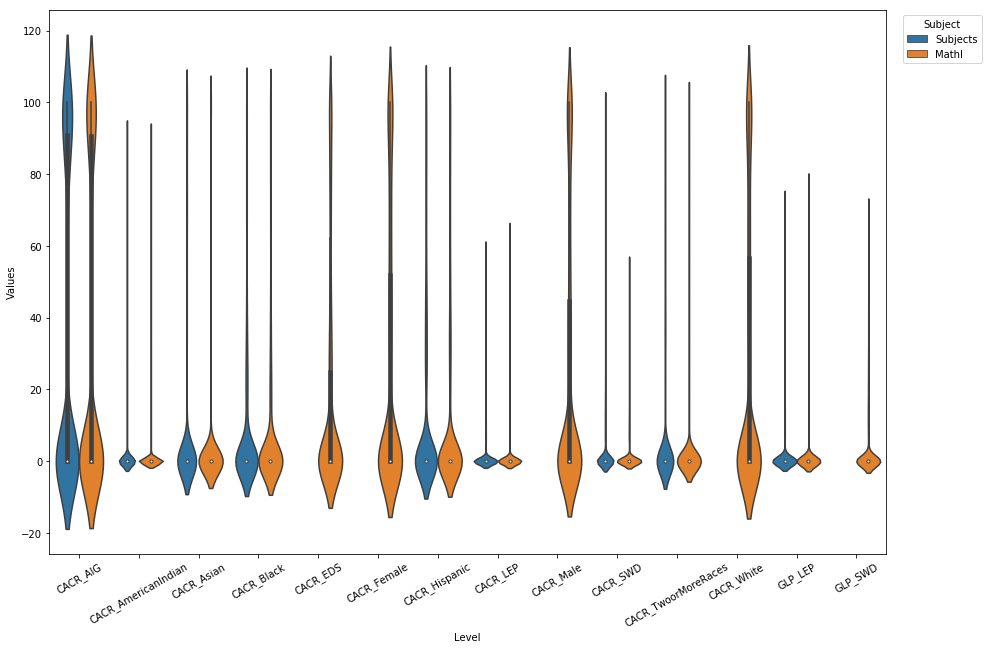

In [29]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='Level',y='Values',hue='Subject',data=EOC_columns);
plt.xticks(rotation=30)

leg = plt.legend( loc = 'upper right',title='Subject')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .12
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

# Here is some text about the EOG stats

# Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

Correlation matrix heatmap: between funding and SPG scores/benchmark grades ---add description.  

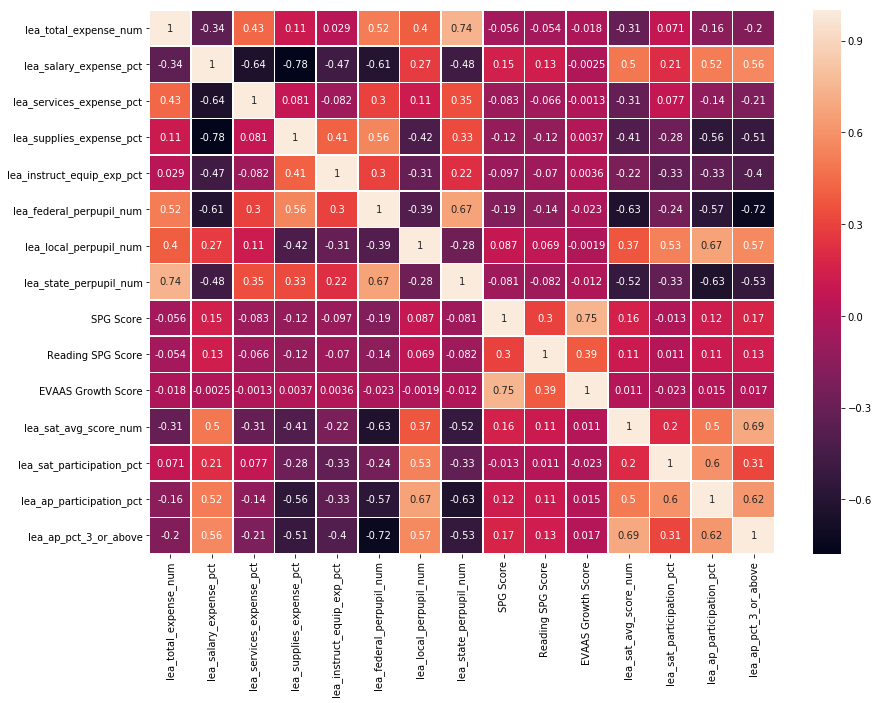

In [61]:
first_heat = school_data[['lea_total_expense_num',
'lea_salary_expense_pct',
'lea_services_expense_pct',
'lea_supplies_expense_pct',
'lea_instruct_equip_exp_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'lea_state_perpupil_num',            
'SPG Score',
'Reading SPG Score',
'EVAAS Growth Score',
'lea_sat_avg_score_num',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_ap_pct_3_or_above',]] 
                       
first_corr = first_heat.corr()

plt.figure(figsize = (14,10)) #size of matrix 
sns.heatmap(first_corr,linewidths=0.5, annot=True) #add correrlation inside boxes

In [ ]:
Correlation matrix heatmap: between funding and attendance/crime rate ---add description.

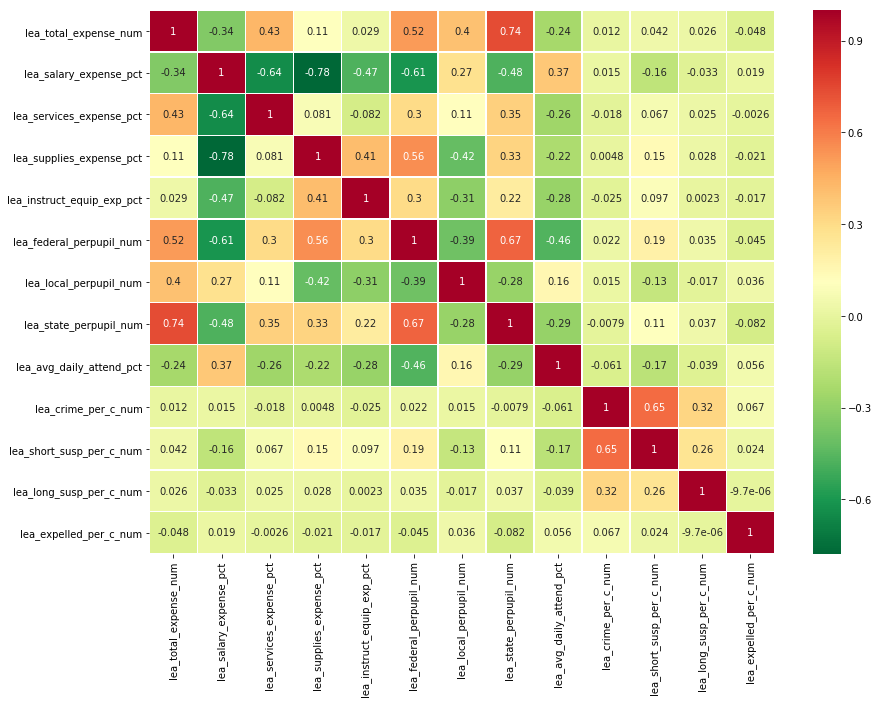

In [60]:
snd_heat = school_data[['lea_total_expense_num',
'lea_salary_expense_pct',
'lea_services_expense_pct',
'lea_supplies_expense_pct',
'lea_instruct_equip_exp_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'lea_state_perpupil_num',            
'lea_avg_daily_attend_pct',
'lea_crime_per_c_num',
'lea_short_susp_per_c_num',
'lea_long_susp_per_c_num',
'lea_expelled_per_c_num',]] 

                       
snd_corr = snd_heat.corr()

plt.figure(figsize = (14,10)) #size of matrix 
sns.heatmap(snd_corr,cmap='RdYlGn_r', linewidths=0.5, annot=True) #add correrlation inside boxes

Correlation matrix heatmap: between race,gender, region ---add description.

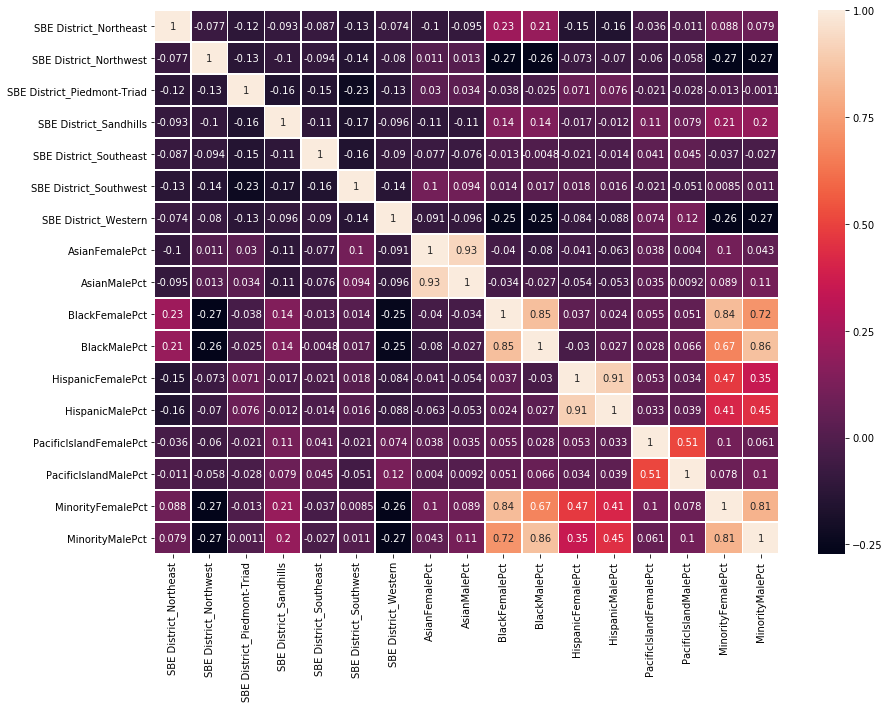

In [59]:
thd_heat = school_data[['SBE District_Northeast',
'SBE District_Northwest',
'SBE District_Piedmont-Triad',
'SBE District_Sandhills',
'SBE District_Southeast',
'SBE District_Southwest',
'SBE District_Western',
'AsianFemalePct',            
'AsianMalePct',
'BlackFemalePct',
'BlackMalePct',
'HispanicFemalePct',
'HispanicMalePct',
'PacificIslandFemalePct',                        
'PacificIslandMalePct',                      
'MinorityFemalePct',
'MinorityMalePct',]] 

                       
thd_corr = thd_heat.corr()

plt.figure(figsize = (14,10)) #size of matrix 
sns.heatmap(thd_corr,linewidths=0.5,annot=True) #add correrlation inside boxes

# Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [31]:
df=pd.DataFrame(school_data)

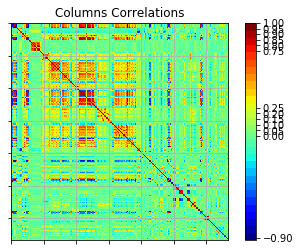

In [32]:
def correlation_matrix(school_data):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
      
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    cmap=cm.get_cmap('jet',30)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    labels=['column_names',]
    plt.title('Columns Correlations')
    ax1.set_xticklabels(labels,fontsize=3)
    ax1.set_yticklabels(labels,fontsize=3)
    # Add colorbar
    fig.colorbar(cax, ticks=[-1,-.95,-.90,0,.05,.1,.15,.2,.25,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

# New Features

Are there other features that could be added to the data or created from existing features? Which ones?

In [33]:
#insert a new feature for SPG as continous values
school_data['SPG']=0
school_data['SPG'] = school_data['SPG Grade_A+NG']*6 + school_data['SPG Grade_B']*5 + school_data['SPG Grade_C']*4 + school_data['SPG Grade_D']*3 + school_data['SPG Grade_F']*2 + school_data['SPG Grade_I']*1
school_data.head()

,student_num,lea_avg_student_num,st_avg_student_num,00_Size,02_Size,03_Size,04_Size,05_Size,Math I_Size,lea_total_expense_num,...,Math SPG Grade_D,Math SPG Grade_F,EVAAS Growth Status_Met,EVAAS Growth Status_NotMet,State Gap Compared_Y,Byod_Yes,_1_to_1_access_Yes,SRC_devices_sent_home_Yes,unit_code,SPG
0,152.0,996.0,853.0,0.0,0.0,0.0,0.0,0.0,21.0,8588.32,...,0,0,1,0,0,0,1,1,10303,0
1,575.0,528.0,490.0,21.0,19.0,22.0,24.0,28.0,0.0,8588.32,...,0,0,0,0,0,0,0,0,10304,4
2,611.0,528.0,490.0,19.0,20.0,19.0,27.0,26.0,0.0,8588.32,...,0,0,0,0,0,0,0,0,10308,4
3,742.0,706.0,629.0,0.0,0.0,0.0,0.0,0.0,26.0,8588.32,...,0,1,1,0,0,0,0,0,10310,2
4,701.0,528.0,490.0,20.0,21.0,22.0,24.0,23.0,0.0,8588.32,...,0,0,0,1,0,0,0,0,10312,4


# Exceptional Work

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

PCA - extracting important variables (in form of components) from a large set of variables available in a data set.

when we have so many features, that means that we are working with high dimentional data. therefore we need to reduce our data dimentions. PCA is the Dimentionality reduction techniques that is very usefull in our project. There are 334 features, and only 2443 rows in the data set. Having too many features and limited data makes Principal Component Analysis a great candidate to find a model that predicts the NC school performance grades. We only consider the quantitative columns, and we would like to choose as many components as needed to explain around 80% of the SPG. Based on the variance explained graph, we must choose at least 62 principal components to explain 80% of the SPG. Variance explained graph illustrates the necessity of having 62 components to address 80% of the SPG.

The other dimentionality reduction technique is using Random Forest Classifier.
it lists the top 40 features along with their scores.

[  19.3    25.9    30.72   35.17   38.43   41.01   43.26   45.1    46.8
   48.34   49.67   50.97   52.21   53.36   54.46   55.5    56.5    57.43
   58.33   59.21   60.03   60.83   61.61   62.35   63.05   63.75   64.42
   65.06   65.68   66.28   66.88   67.46   68.02   68.58   69.13   69.67
   70.19   70.69   71.18   71.67   72.15   72.61   73.06   73.5    73.93
   74.36   74.77   75.18   75.57   75.96   76.34   76.71   77.07   77.43
   77.78   78.12   78.46   78.79   79.12   79.44   79.76   80.07   80.37
   80.67   80.97   81.26   81.54   81.82   82.1    82.37   82.63   82.89
   83.15   83.41   83.66   83.91   84.16   84.4    84.64   84.88   85.11
   85.34   85.56   85.78   86.     86.21   86.42   86.63   86.84   87.04
   87.24   87.43   87.62   87.81   88.     88.18   88.36   88.54   88.72
   88.9    89.07   89.24   89.41   89.58   89.74   89.9    90.06   90.22
   90.37   90.52   90.67   90.82   90.96   91.1    91.24   91.38   91.52
   91.65   91.78   91.91   92.04   92.17   92.29   9

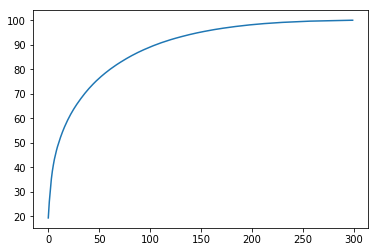

In [34]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=school_data.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=300)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)

plt.plot(var1)
pca = PCA(n_components=62)
pca.fit(X)
X1=pca.fit_transform(X)

print (X1)

#Looking at above plot I'm taking 62 variables

array([ 0.19296552,  0.06603664,  0.0482083 ,  0.04452714,  0.03258659,
        0.02578119,  0.02245266,  0.01842167,  0.01703561,  0.01538635,
        0.01334409,  0.01297819,  0.01244425,  0.01150513,  0.01102486,
        0.01035525,  0.01002074,  0.00929325,  0.0089761 ,  0.00880335,
        0.00817382,  0.00798278,  0.00776564,  0.00737915,  0.00700595,
        0.00694886,  0.00667757,  0.0064161 ,  0.00623763,  0.00603575,
        0.00597675,  0.00580723,  0.0056194 ,  0.00556552,  0.00550007,
        0.00542981,  0.00517177,  0.00497119,  0.0049324 ,  0.00484934,
        0.00479539,  0.00458723,  0.00449723,  0.00440604,  0.00430508,
        0.0042433 ,  0.00406926,  0.00404021,  0.00389652,  0.00377312,
        0.00363817,  0.00356031,  0.00353454,  0.00349785,  0.00340911,
        0.00334236,  0.00331309,  0.00324606,  0.00318792,  0.00313788,
        0.00304715,  0.0029479 ])

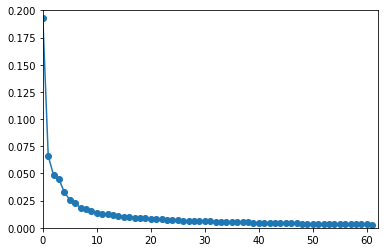

In [35]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlim(0,62)
plt.ylim(0,0.2)
pca.explained_variance_ratio_

In [36]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = school_data.iloc[:,0:40]
Y = school_data.iloc[:,-1]
names = school_data.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))


Features sorted by their score:
[(0.28289999999999998, 'SPG Score'), (0.1981, 'EOG/EOCSubjects_CACR_All'), (0.1147, 'Reading SPG Score'), (0.055800000000000002, 'EVAAS Growth Score'), (0.042999999999999997, 'student_num'), (0.037199999999999997, 'Science Score'), (0.035700000000000003, 'EOGGr4_CACR_All'), (0.032099999999999997, 'EOGGr5_CACR_All'), (0.025700000000000001, 'EOCMathI_CACR_Male'), (0.0177, 'EOGGr3_CACR_All'), (0.016299999999999999, 'NC Math 1 Score'), (0.0129, 'lea_avg_student_num'), (0.0126, 'EOCMathI_CACR_Female'), (0.012500000000000001, 'st_avg_student_num'), (0.011299999999999999, 'lea_state_perpupil_num'), (0.0099000000000000008, 'lea_local_perpupil_num'), (0.0091999999999999998, '00_Size'), (0.0083000000000000001, 'lea_services_expense_pct'), (0.0074999999999999997, 'lea_instruct_equip_exp_pct'), (0.0064000000000000003, 'Math I_Size'), (0.0063, 'lea_total_expense_num'), (0.0063, 'lea_supplies_expense_pct'), (0.0061999999999999998, '05_Size'), (0.0060000000000000001, '